## 활성화함수

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 계단함수

In [5]:
def step_func(x) :

    y = x > 0
    return np.array(y, dtype = int)

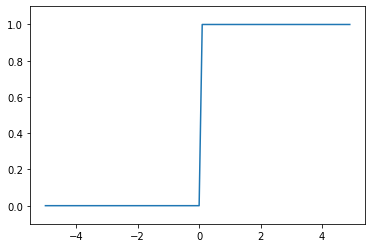

In [6]:
x = np.arange(-5., 5., 0.1)
y = step_func(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 시그모이드 함수

In [26]:
def sigmoid(x):

    return 1 / (1+np.exp(-x))

In [10]:
li = [-1., 1., 5.]
x = np.array(li)

sigmoid(x)

array([0.26894142, 0.73105858, 0.99330715])

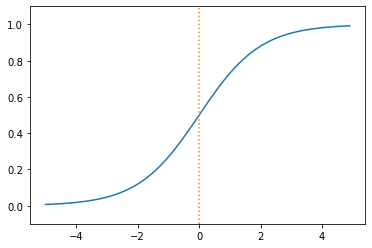

In [23]:
x = np.arange(-5., 5., .1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.plot([0,0],[-0.1,1.1], ':') # 가운데 점선 추가 
plt.show()

### 렐루함수

In [26]:
def relu(x):

    return np.maximum(0, x)

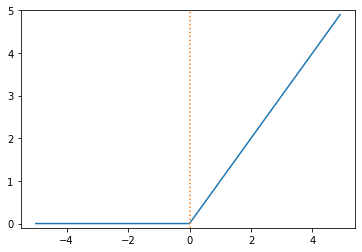

In [30]:
x = np.arange(-5., 5., .1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-0.1, 5)
plt.plot([0,0],[-0.1,5], ':') # 가운데 점선 추가 
plt.show()

## 3층 신경망 구현

![](../image/1.png)

In [31]:
import numpy as np

def sigmoid(x):

    return 1 / (1+np.exp(-x))

def identity_func(x):
    
    return x


def init_parameters() :
    
    parameters = {}  # dic
    
    parameters['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])    # 2 * 3
    parameters['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])  # 3 * 2
    parameters['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])              # 2 * 2    
    
    parameters['b1'] = np.array([0.1, 0.2, 0.3])       # 3    
    parameters['b2'] = np.array([0.1, 0.2])            # 2    
    parameters['b3'] = np.array([0.1, 0.2])            # 2    
    
    return parameters


def forward(parameters, x) :
    
    W1, W2, W3 = parameters['W1'], parameters['W2'], parameters['W3']
    b1, b2, b3 = parameters['b1'], parameters['b2'], parameters['b3']
    
    # 신경망
    
    # layer 1
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)        # 시그모이드 함수
    
    # layer 2
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    # output layer
    a3 = np.dot(z2, W3) + b3
    y  = identity_func(a3)  # 항등함수
    
    return y

In [32]:
# 실행
parameter = init_parameters()  
x = np.array([1.0, 0.5])

y= forward(parameter, x)
print(y)

[0.31682708 0.69627909]


## 소프트맥스 함수

In [34]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
exp_a

array([ 1.34985881, 18.17414537, 54.59815003])

In [35]:
sum_exp_a = np.sum(exp_a)  # 지수함수 합
sum_exp_a

74.1221542101633

In [36]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [25]:
def softmax(a) :

    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [39]:
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

### 오버플로 해결

In [41]:
# test
np.exp(np.log(2))

2.0

In [42]:
# 오버플로 문제
a = np.array([1010, 1000, 990])

softmax(a)

/var/folders/54/1kvtx3bn6v3c82sc7wg7yvdw0000gn/T/ipykernel_28021/3651283009.py:3: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
/var/folders/54/1kvtx3bn6v3c82sc7wg7yvdw0000gn/T/ipykernel_28021/3651283009.py:5: RuntimeWarning: invalid value encountered in true_divide
  y = exp_a / sum_exp_a


array([nan, nan, nan])

In [44]:
# 오버플로 해결
c = np.max(a)  # 최대값
a - c

array([  0, -10, -20])

In [48]:
np.round(softmax(a-c), 4)

array([1., 0., 0.])

In [49]:
# 'x - 최대값'으로 다시 구현

def softmax(a) :

    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [50]:
a = np.array([1010, 1000, 990])

softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

## 손글씨 숫자 인식

In [1]:
import sys
import os

import numpy as np

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

In [2]:
from dataset.mnist import load_mnist

(x_train, y_train), (x_test, y_test) = load_mnist(flatten=True, normalize=False)

In [4]:
from PIL import Image

def img_show(img):
    
    pil_image = Image.fromarray(np.uint8(img))
    pil_image.show()
    
    
img   = x_train[0]
label = y_train[0]
label

5

In [5]:
img.shape

(784,)

In [6]:
img = img.reshape(28, 28)
img.shape

(28, 28)

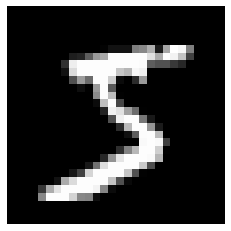

In [7]:
import matplotlib.pyplot as plt

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [8]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test  # test만 반환


def init_network():
    with open("ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [70]:
x, y = get_data()

In [71]:
x.shape

(10000, 784)

In [72]:
y.shape

(10000,)

In [74]:
x, y = get_data()
network = init_network()          # 가중치 가져오기


accuracy_cnt = 0

for i in range(len(x)) :
    pred = predict(network, x[i]) # test셋 : 하나씩
    p = np.argmax(pred)           # like softmax
    
    if p == y[i] :
        accuracy_cnt += 1
        

print(accuracy_cnt/len(x))
    

0.9352


### 배치처리

In [9]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [10]:
x.shape

(10000, 784)

In [11]:
x[0].shape

(784,)

In [12]:
W1.shape

(784, 50)

In [13]:
W2.shape

(50, 100)

In [14]:
W3.shape

(100, 10)

In [15]:
# test
for i in range(0, 10, 2) :  # 세번째 : 계단
    print(i)

0
2
4
6
8


In [17]:
print([i for i in range(0, len(x), 100)])

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900]


In [19]:
x, y = get_data()
y

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [23]:
np.argmax(np.array([[1,2,3,4,5], [5,4,3,2,1]]), axis=1), np.argmax(np.array([[1,2,3,4,5], [5,4,3,2,1]]), axis=1).shape

(array([4, 0]), (2,))

In [29]:
x, y = get_data()
network = init_network()          # 가중치 가져오기


batch_size   = 100               # 배치사이즈
accuracy_cnt = 0

for i in range(0, len(x), 100) :

    
    x_batch = x[i:i+batch_size]
    pred_batch = predict(network, x_batch)  # test셋 : 배치만큼
    
    p = np.argmax(pred_batch, axis=1)             # like softmax : (중요) axis = 1 > 열기준 
    
    accuracy_cnt += np.sum(p == y[i:i+batch_size])
        

print(accuracy_cnt/len(x))

0.9352


## 손실함수

### SSE : 오차제곱합

In [36]:
m = 2
print(f'{m}')

2


In [37]:
def sse(pred, y) :
    
    return 0.5 * np.sum((pred-y)**2)

In [44]:
# 정답은 '2'
y = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# ex1 '2'일 확률이 가장 높다고 추정함(0.6)
pred = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

mse = sse(np.array(pred), np.array(y))
print(f'ex1: {mse}')  


# ex2 '7'일 확률이 가장 높다고 추정함(0.6)
pred = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mse = sse(np.array(pred), np.array(y))
print(f'ex2: {mse}') 

ex1: 0.09750000000000003
ex2: 0.5975


### CEE: 크로스 엔트로피

In [65]:
def cee(pred, target) :
    
    delta = 1e-7
    return -np.sum(target * np.log(pred+delta))

In [55]:
np.round(cee(np.array([0., 1.]), np.array([0., 1.])), 3)

-0.0

In [67]:
target = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
pred = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

e = cee(np.array(pred), np.array(target))
print(e)  # 0.510825457099

pred = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cee = cee(np.array(pred), np.array(target))

print(cee)  # 2.30258409299

0.510825457099338
2.302584092994546


## 미니배치학습

In [72]:
import numpy as np
import sys
import os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist


(x_train, y_train), (x_test, y_test) = load_mnist(normalize=True, one_hot_label=False)

print(x_train.shape)  # (60000, 784)
print(y_train.shape)  # 원-핫 인코딩 된 정답 레이블 (60000, 10)

(60000, 784)
(60000,)


In [71]:
# test
np.random.choice(60000, 10)

array([48062, 21154, 38147, 54032,  2549,  8073, 18358, 56719, 25755,
       24996])

In [74]:
x_train.shape[0]

60000

In [77]:
train_size = x_train.shape[0]
batch_size = 10

batch_index = np.random.choice(train_size, batch_size)

# x_train[batch_index].shape
x_train_batch = x_train[batch_index]
y_train_batch = y_train[batch_index]

In [78]:
x_train_batch.shape, y_train_batch.shape

((10, 784), (10,))

In [79]:
x_train_batch.ndim

2

In [84]:
y_train_batch.ndim

1

### 교차 엔트로피

- target : 원핫인코딩

In [102]:
def cee(pred, target) :
    
    delta = 1e-7
    
    # train set : 1차원일 경우 > 아래 batch_size 변수와 연동
    
    if pred.ndim == 1 :
        
        # target = target.reshape(1, target.size)        
        pred   = pred.reshape(1, pred.size)

        print(target, pred)
            
    batch_size = pred.shape[0]  
    
    
    return -np.sum(target * np.log(pred+delta)) / batch_size

In [156]:
cee(np.array([0., 1.]), np.array([0, 1]))

[0 1] [[0. 1.]]


-9.999999505838704e-08

- target : 숫자레이블 > np.arange 활용 > 인덱싱

In [112]:
# ex
print([np.arange(2), np.array([0,1])])
print(np.array([[100,1],[1,100]])[np.arange(2), np.array([0,1])])

[array([0, 1]), array([0, 1])]
[100 100]


In [160]:
def cee_label(pred, target) :
    
    delta = 1e-7
    
    # train set : 1차원일 경우 > 아래 batch_size 변수와 연동
    
    if pred.ndim == 1 :
        
        # target = target.reshape(1, target.size)        
        pred   = pred.reshape(1, pred.size)

        print(target, pred)
            
    batch_size = pred.shape[0]  
    
    index = np.arange(batch_size), target # target : label
    
    
    return - np.sum(np.log(pred[index]) + delta) / batch_size

In [162]:
cee_label(np.array([[0., 1.], [1., 0.]]), np.array([1, 0]))

-1e-07

## 수치미분

In [16]:
def num_diff(f, x) : # f : 함수
    
    h = 1e-4  # 10^-4
    
    return (f(x+h) - f(x-h)) / (2*h)

y = 0.01 * x^2 + 0.1 * x

In [1]:
def func_1(x) :
    
    return 0.01*x**2 + 0.1*x

In [2]:
func_1(2)

0.24000000000000002

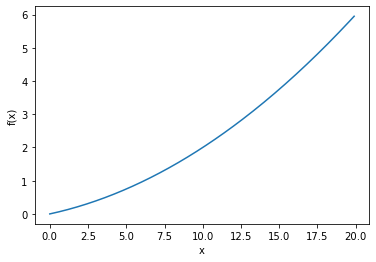

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0., 20., 0.1)
y = func_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")

plt.plot(x, y)
plt.show()

In [8]:
# np.arange(0., 20., 0.1)  : np.arange
print(x)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 

In [17]:
num_diff(func_1, 5)

0.1999999999990898

In [18]:
# test
func_1

<function __main__.func_1(x)>

In [19]:
num_diff(func_1, 10)

0.2999999999986347

In [20]:
def func_2(x) :
    
    return np.sum(x ** 2)

In [21]:
# ex
x = np.array([1., 2.])

func_2(x)

5.0

## 편미분

In [23]:
def func_tmp_1(x0) :

    return x0*x0 + 4.0**2.0 
    

num_diff(func_tmp_1, 3.0)  # (해석적 미분) 2 * x0, 상수 > 0 

6.00000000000378

In [24]:
def func_tmp_2(x1) :

    return 3.0 ** 2.0 + x1*x1 
    

num_diff(func_tmp_2, 4.0) # (해석적 미분) 2 * x0, 상수 > 0 

7.999999999999119

### 편미분 벡터 : gradient

In [37]:
def num_grad(f, x) :
    
    h = 1e-4
    grad = np.zeros_like(x)  # 초기화
    
    for index in range(x.shape[0]) :
        
        tmp_val = x[index]
        
        # f(x+h)
        x[index] = tmp_val + h
        fxh1 = f(x)
        
        # print(x)
        
        x[index] = tmp_val - h
        fxh2 = f(x)
        
        # print(x)
        
        grad[index] = (fxh1 - fxh2) / (2*h)
        
        x[index] = tmp_val  # 원복
        
        # print(x)
        
    return grad
    

In [29]:
num_grad(func_2, np.array([3., 4.]))

[3.0001 4.    ]
[2.9999 4.    ]
[3. 4.]
[3.     4.0001]
[3.     3.9999]
[3. 4.]


array([6., 8.])

## 경사하강법

In [38]:
def grad_descent(f, init_x, lr=0.01, step_num=100) :
    
    x = init_x
    
    for i in range(step_num) :
        
        grad = num_grad(f, x)
        print(f'grad : {grad}')
        
        x -= lr * grad  # update
        print(f'x : {x}')
        
    return x  # 최소값일때 x 리턴

In [39]:
init_x = np.array([-3., 4.])
grad_descent(func_2, init_x, lr=0.1)

grad : [-6.  8.]
x : [-2.4  3.2]
grad : [-4.8  6.4]
x : [-1.92  2.56]
grad : [-3.84  5.12]
x : [-1.536  2.048]
grad : [-3.072  4.096]
x : [-1.2288  1.6384]
grad : [-2.4576  3.2768]
x : [-0.98304  1.31072]
grad : [-1.96608  2.62144]
x : [-0.786432  1.048576]
grad : [-1.572864  2.097152]
x : [-0.6291456  0.8388608]
grad : [-1.2582912  1.6777216]
x : [-0.50331648  0.67108864]
grad : [-1.00663296  1.34217728]
x : [-0.40265318  0.53687091]
grad : [-0.80530637  1.07374182]
x : [-0.32212255  0.42949673]
grad : [-0.64424509  0.85899346]
x : [-0.25769804  0.34359738]
grad : [-0.51539608  0.68719477]
x : [-0.20615843  0.27487791]
grad : [-0.41231686  0.54975581]
x : [-0.16492674  0.21990233]
grad : [-0.32985349  0.43980465]
x : [-0.1319414   0.17592186]
grad : [-0.26388279  0.35184372]
x : [-0.10555312  0.14073749]
grad : [-0.21110623  0.28147498]
x : [-0.08444249  0.11258999]
grad : [-0.16888499  0.22517998]
x : [-0.06755399  0.09007199]
grad : [-0.13510799  0.18014399]
x : [-0.0540432   0.0720

array([-6.11110793e-10,  8.14814391e-10])

In [43]:
np.round([-6.11110793e-10, 8.14814391e-10], 3)

array([-0.,  0.])